In [2]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath

from jwlab.cluster_analysis_perm import cluster_analysis_procedure
from jwlab.ml_prep_perm import prep_ml, slide_df, init, load_ml_data, get_bad_trials, map_participants,average_trials_and_participants
from jwlab.bad_trials import get_bad_trials, get_left_trial_each_word


from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


In [3]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_fold iterations, number of sample iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5])

Valid positive windows are: [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 93, 94, 95, 96, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]

Valid negative windows are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 92]

Positive clusters are: [[440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650], [730, 740, 750, 760], [800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900]]

Negative clusters are: [[-200, -190, -180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80], [180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420]]

Positive tmass values are: [0, 

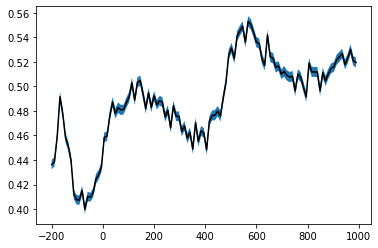

In [5]:
result = cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [100], 10], [3, 15, 20])

In [25]:
import statistics
negsum = 0
negsum += stats.ttest_1samp(result[0][15], .5).statistic
negsum += stats.ttest_1samp(result[0][16], .5).statistic
negsum += stats.ttest_1samp(result[0][17], .5).statistic
negsum += stats.ttest_1samp(result[0][18], .5).statistic
negsum += stats.ttest_1samp(result[0][19], .5).statistic

In [26]:
negsum

-87.39154049028781

In [6]:
results = cluster_analysis_procedure(9, False, "average_trials_and_participants", [-200, 1000, [100], 10], [1, 1, 20])

KeyboardInterrupt: 

In [5]:
results

{0: {0: [0.5,
   0.625,
   0.625,
   0.4375,
   0.4375,
   0.6875,
   0.5,
   0.5625,
   0.375,
   0.5,
   0.4375,
   0.5625,
   0.375,
   0.375,
   0.4375,
   0.5,
   0.375,
   0.4375,
   0.375,
   0.625],
  1: [0.625,
   0.625,
   0.625,
   0.3125,
   0.5625,
   0.5625,
   0.5,
   0.5625,
   0.3125,
   0.5,
   0.4375,
   0.5625,
   0.375,
   0.5,
   0.4375,
   0.5,
   0.5,
   0.375,
   0.5,
   0.625],
  2: [0.625,
   0.625,
   0.625,
   0.3125,
   0.5625,
   0.5625,
   0.4375,
   0.5625,
   0.3125,
   0.5,
   0.4375,
   0.5,
   0.5625,
   0.5,
   0.4375,
   0.5625,
   0.5,
   0.375,
   0.5,
   0.5625],
  3: [0.5625,
   0.5625,
   0.6875,
   0.375,
   0.5,
   0.5625,
   0.3125,
   0.5625,
   0.3125,
   0.5625,
   0.4375,
   0.375,
   0.625,
   0.4375,
   0.4375,
   0.5,
   0.5625,
   0.375,
   0.5,
   0.5],
  4: [0.5625,
   0.5,
   0.75,
   0.4375,
   0.5625,
   0.5625,
   0.25,
   0.5625,
   0.375,
   0.5625,
   0.4375,
   0.4375,
   0.625,
   0.5,
   0.4375,
   0.5,
   0.5,
   0.5,


In [ ]:
num_win= 120

pvalues_pos = []
pvalues_neg = []
tvalues_pos = []
tvalues_neg = []
for i in range(len(results)):
    for j in range(num_win):
        # change the second argument below for comparison
        istat = stats.ttest_1samp(results[i][j], .5)
        pvalues_pos += [istat.pvalue] if istat.statistic > 0 else [1]
        pvalues_neg += [istat.pvalue] if istat.statistic < 0 else [1]
        # removed just so that we can get the negative value from the pre window
        tvalues_pos += [istat.statistic] if istat.statistic > 0 else [0]
        tvalues_neg += [istat.statistic] if istat.statistic < 0 else [0]

In [2]:
# For null distribution
# MAKE SURE YOU TURN OFF PRINT FUNCTION

itr = 50 
arrTmass = []

for i in range(itr):
    tmass = cluster_analysis_procedure(11, True, "permutation", [-200, 1000, [10], 10], [3, 15, 20])
    arrTmass.append(round(tmass, 4))
    print(i)
print(arrTmass)

549.4334729161642
0


KeyboardInterrupt: 

In [ ]:


plt.hist(arrTmass, bins = 20)
plt.show()